In [126]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import transpile
from qiskit_aer import Aer

# 1º: Crie o Circuito

Nesta etapa, daremos início à implementação do protocolo de teleporte quântico. O teleporte quântico consiste na transmissão de um estado quântico entre duas partes, sem violar o teorema do no-clone nem o princípio da localidade. Isso ocorre porque o estado original não é copiado, mas sim destruído por medição e reconstruído no destino com base em informações clássicas.

Para fins didáticos, utilizaremos o simulador aer_simulator, que opera em um ambiente ideal, livre de ruído. Nesse exemplo, iremos teleportar o estado ket-, ao final do protocolo, aplicaremos uma porta Hadamard para recuperar o estado ket 1

O protocolo utilizará um único par emaranhado (um par EPR) e será demonstrado com dois personagens clássicos: Alice, que possui o estado quântico a ser teleportado, e Bob, que irá recebê-lo ao final.

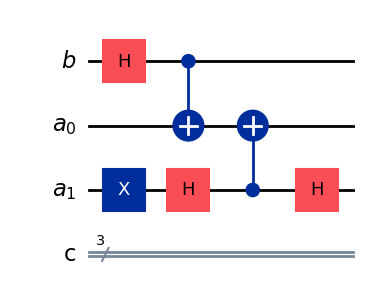

In [127]:
# Criação dos Registradores Quânticos, Registradores Clássicos e do Circuito Quântico
qra = QuantumRegister(2, 'a')
qrb = QuantumRegister(1, 'b')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qrb, qra, cr)

# Criação do Estado Emaranhado Phi+ entre Alice e Bob
qc.h(0)
qc.cx(0, 1)

# Criação do Estado ket- (Psi) Para teleporte
qc.x(2)
qc.h(2)

# Protocolo de Emaranhamento
#qc.barrier()
qc.cx(2, 1)
qc.h(2)

# Visualização do Circuito
qc.draw('mpl')

In [128]:
# Visualização Matemática dos Estados Quânticos
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

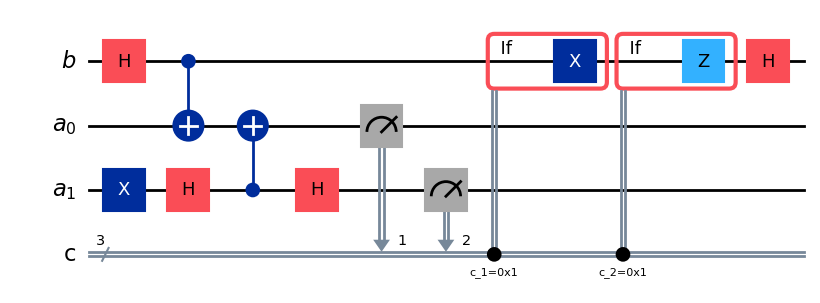

In [129]:
# Medições e Continuação do Protocolo
qc.measure(1, 1)
qc.measure(2, 2)

with qc.if_test((cr[1], 1)):
    qc.x(0)

with qc.if_test((cr[2], 1)):
    qc.z(0)

#qc.barrier()

# Desfazendo o Estado Ket- para Ket 1
qc.h(0)
qc.draw('mpl')

# 2º: Execução do Código no Simulador Livre de Ruído

Esse é o penúltimo passo. Com a medição do primeiro qubit, devemos ser capazes de recuperar o estado ket 1.

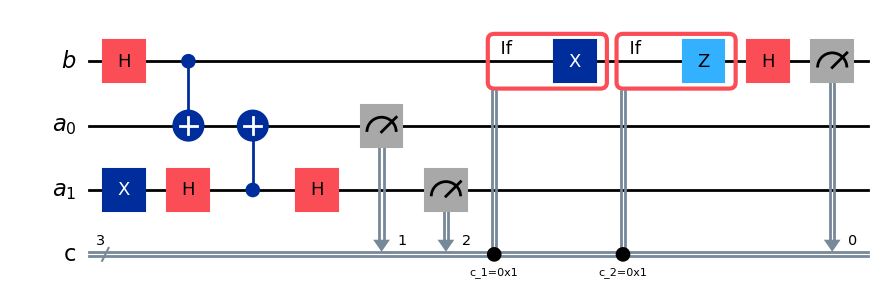

In [130]:
# Medir os qubits em registradores clássicos

qc.measure(0, 0)
qc.draw('mpl')

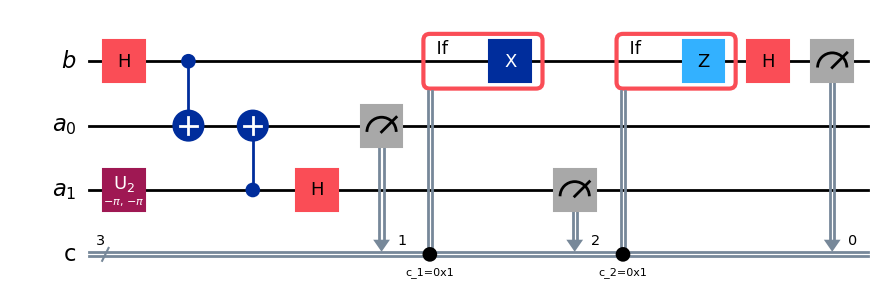

In [131]:
# Selecionando o Simulador
simulator = Aer.get_backend('aer_simulator')


# Transpilando para as portas trabalhadas no simulador
trp_qc = transpile(backend=simulator, circuits=qc)
trp_qc.draw('mpl')

In [132]:
# Rodando 1024 vezes o circuito transpilado no simulador
run = simulator.run(circuits=trp_qc, shots=1024)

# Colhendo os resultados
results = run.result()

# Colhendo a contagem dos estados obtidos
counts = results.get_counts()
counts

{'101': 271, '001': 249, '011': 242, '111': 262}

# 3º: Visualização de Resultados

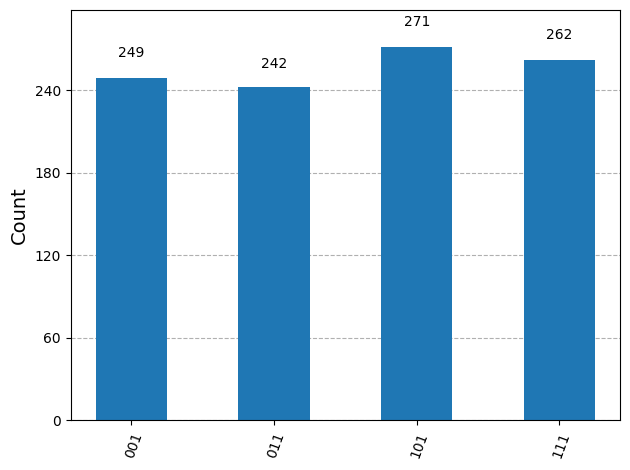

In [133]:
plot_histogram(counts)